**Data of various countries and the factors affecting their Life expectancy has been recorded over past few decades. An analytics firm would like to know how it varies country wise and what other factors are influential in model building. Use your skills to analyze the data and build a Lasso and Ridge Regression model and also summarize the output of the model.**

**Business Objective:- To predict the life expectancy of the peoples.**

In [1]:
#lets import the required librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
life= pd.read_csv(r"C:\Users\D\Desktop\New Assignments  Keys\Datasets\Life_expectencey_LR.csv")
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Status                  2938 non-null   object 
 3   Life_expectancy         2928 non-null   float64
 4   Adult_Mortality         2928 non-null   float64
 5   infant_deaths           2938 non-null   int64  
 6   Alcohol                 2744 non-null   float64
 7   percentage_expenditure  2938 non-null   float64
 8   Hepatitis_B             2385 non-null   float64
 9   Measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  under_five_deaths       2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  Total_expenditure       2712 non-null   float64
 14  Diphtheria              2919 non-null   

###### Life expectancy is the target variable

In [3]:
life.isna().sum()

Country                     0
Year                        0
Status                      0
Life_expectancy            10
Adult_Mortality            10
infant_deaths               0
Alcohol                   194
percentage_expenditure      0
Hepatitis_B               553
Measles                     0
BMI                        34
under_five_deaths           0
Polio                      19
Total_expenditure         226
Diphtheria                 19
HIV_AIDS                    0
GDP                       448
Population                652
thinness                   34
thinness_yr                34
Income_composition        167
Schooling                 163
dtype: int64

In [4]:
# lot of variables have missing values

missing = life.isna().sum()[life.isna().sum() != 0] / life.shape[0]
# some columns have very high missing values, let us delete them

high_missing_val = missing[(life.isna().sum()[life.isna().sum() != 0] / life.shape[0])>0.01].index.tolist()

life.drop(high_missing_val, axis = 1, inplace = True)

In [5]:
high_missing_val

['Alcohol',
 'Hepatitis_B',
 'BMI',
 'Total_expenditure',
 'GDP',
 'Population',
 'thinness',
 'thinness_yr',
 'Income_composition',
 'Schooling']

In [6]:
life.isna().sum()

Country                    0
Year                       0
Status                     0
Life_expectancy           10
Adult_Mortality           10
infant_deaths              0
percentage_expenditure     0
Measles                    0
under_five_deaths          0
Polio                     19
Diphtheria                19
HIV_AIDS                   0
dtype: int64

In [7]:
# exploring categorical columns

life['Country'].value_counts(),life['Year'].value_counts(),life['Status'].value_counts()

(Afghanistan              16
 Peru                     16
 Nicaragua                16
 Niger                    16
 Nigeria                  16
                          ..
 Niue                      1
 San Marino                1
 Nauru                     1
 Saint Kitts and Nevis     1
 Dominica                  1
 Name: Country, Length: 193, dtype: int64,
 2013    193
 2015    183
 2014    183
 2012    183
 2011    183
 2010    183
 2009    183
 2008    183
 2007    183
 2006    183
 2005    183
 2004    183
 2003    183
 2002    183
 2001    183
 2000    183
 Name: Year, dtype: int64,
 Developing    2426
 Developed      512
 Name: Status, dtype: int64)

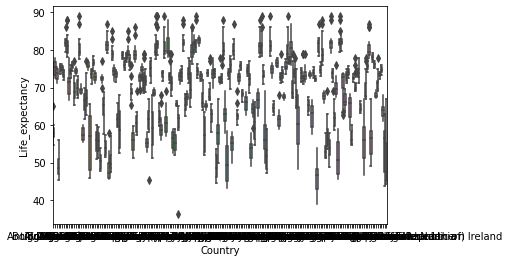

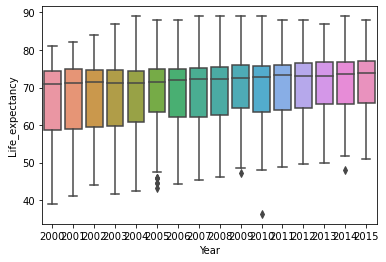

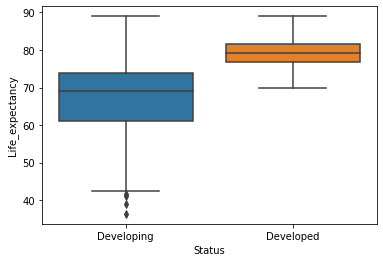

In [8]:
sns.boxplot(x = 'Country', y = 'Life_expectancy', data = life);plt.show()
sns.boxplot(x = 'Year', y = 'Life_expectancy', data = life);plt.show()
sns.boxplot(x = 'Status', y = 'Life_expectancy', data = life);plt.show()

In [9]:
# country has too much variance, we can drop it
life.drop('Country', axis = 1, inplace = True)

In [10]:
X = life.drop('Life_expectancy', axis = 1)
y = life['Life_expectancy']
X.isna().sum(),y.isna().sum()

(Year                       0
 Status                     0
 Adult_Mortality           10
 infant_deaths              0
 percentage_expenditure     0
 Measles                    0
 under_five_deaths          0
 Polio                     19
 Diphtheria                19
 HIV_AIDS                   0
 dtype: int64,
 10)

In [11]:
num_var = [col for col in X.select_dtypes(np.number)]
#we have missing values let us replcae them with median

for col in X[num_var].columns:
    X[col].fillna(X[col].median(), inplace = True)

y.fillna(y.median(), inplace = True)

In [12]:
# scaling numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X[num_var])

scaled_X = pd.concat([pd.DataFrame(scaler.transform(X[num_var]), columns = num_var), X['Status']], axis = 1)

# creating dummy variables

scaled_X = pd.get_dummies(data=scaled_X, columns = ['Status'], drop_first = True)

In [13]:
# ## Train - test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=0)

In [14]:
# building base model first
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

print('Test RMSE',np.sqrt(mean_squared_error(y_test,test_pred)))
# RMSE of 4.03 on test dataset
print('Test R-Squared',r2_score(y_test,test_pred))
# R square of 82.5% on test dataset

print('Train RMSE',np.sqrt(mean_squared_error(y_train,train_pred)))
# RMSE of 4.07 on train dataset
print('Train R-SquaredE',r2_score(y_train,train_pred))
# R square of 81.4% on test dataset

Test RMSE 5.117138996133059
Test R-Squared 0.7206293364041971
Train RMSE 4.904842161244955
Train R-SquaredE 0.730443441207912


In [16]:
#### Now we will use Elastic Net as it combines the penalties of ridge regression and lasso regreesion

from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

elastic_model.fit(X_train,y_train)

elastic_model.l1_ratio_
# elastic model selected the l1 ratio as 1 which means 100% lasso, which means ridge is not preferred for this case
# as some variables could be totally useless

1.0

In [17]:
test_predictions_en = elastic_model.predict(X_test)
train_predictions_en = elastic_model.predict(X_train)


print('Test RMSE',np.sqrt(mean_squared_error(y_test,test_predictions_en)))
# RMSE of 4.04 on test dataset
print('Test R-Squared',r2_score(y_test,test_predictions_en))
# R square of 82.5% on test dataset

print('Train RMSE',np.sqrt(mean_squared_error(y_train,train_predictions_en)))
# RMSE of 4.07 on train dataset
print('Train R-Squared',r2_score(y_train,train_predictions_en))
# R square of 81.3% on test dataset

Test RMSE 5.122397051674861
Test R-Squared 0.720054913404816
Train RMSE 4.909103802290017
Train R-Squared 0.7299748217040196


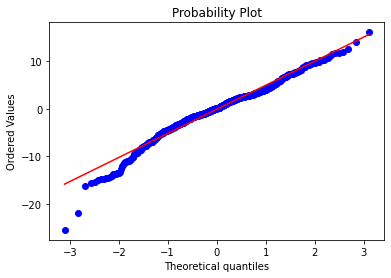

In [18]:
## Model is right and good fit with no drop in performance vs base model

from scipy import stats
# Q-Q plot of errors
res = y_test - test_predictions_en
stats.probplot(res, dist = "norm", plot = plt)
plt.show()

errors seem to be normally distributed - model is ok

In [19]:
## Cheking the selected features

elastic_model.coef_

print(list(zip(elastic_model.coef_, X_train.columns)))

[(0.5346197584627864, 'Year'), (-3.5267067288790495, 'Adult_Mortality'), (12.596753567471023, 'infant_deaths'), (1.2150657949011352, 'percentage_expenditure'), (-0.37862081417904003, 'Measles'), (-13.267798678609948, 'under_five_deaths'), (1.186686275167722, 'Polio'), (1.208646027827539, 'Diphtheria'), (-2.248683340157221, 'HIV_AIDS'), (-4.797149275257941, 'Status_Developing')]


###### coef is huge for infant_deaths, under_5_deaths